The animal shelter data has information about animals based on their id, name, animal intake data, intake condition, animal type, intake sex, Breed type 1 and 2, Color type 1 and 2, Intake age, outcome age, outcome date, length of stay, no of babies. We would like to predict the animal shelter outcome as to if these animals were adopted, euthanized or tranfered to another shelter.

There are a few descriptive features that are of not much importance or interest. Would not like to use IntakeDate, OutcomeDate, Name, AnimalId. We would like to build a neural network in Keras that learn the model based on the training dataset and predict the outcome for the testing dataset. We will also measure the accuracy of the model.

In [1]:
#munging, cleaning the training data
import pandas as pd
from sklearn import preprocessing
dataframe = pd.read_csv('aac_train.csv', usecols=['IntakeType','IntakeCondition','AnimalType','IntakeSex','Breed1','Breed2','Color1','Color2','IntakeAge','OutcomeAge','LengthOfStay','Baby','OutcomeType'])
columns = dataframe.columns
print(columns)
# rearranging the columns for ease of view
dataframe = dataframe[['IntakeType','IntakeCondition','AnimalType','IntakeSex','Breed1','Breed2','Color1','Color2','IntakeAge','OutcomeAge','LengthOfStay','Baby','OutcomeType']]
print(dataframe.head(5))

dataframe.describe()
#throwing away all tuples with missing values without causing any bias
dataframe.dropna(inplace=True)
dataframe.describe()

#listing unique values in each column of the dataframe
print('unique intake type values: %s'%dataframe.IntakeType.unique())
print('unique intake condition values: %s'%dataframe.IntakeCondition.unique())
print('unique animal type values: %s'%dataframe.AnimalType.unique())
print('unique intake sex values: %s'%dataframe.IntakeSex.unique())
print('unique breed 1 values: %s'%dataframe.Breed1.unique())
print('unique breed 2 values: %s'%dataframe.Breed2.unique())
print('unique color 1 values: %s'%dataframe.Color1.unique())
print('unique color 2 values: %s'%dataframe.Color2.unique())
print('unique outcome type values %s'%dataframe.OutcomeType.unique())


#let us replace the string values with numbers like 0,1,2...
dataframe['IntakeType'] = pd.factorize(dataframe.IntakeType)[0]+1
dataframe['IntakeCondition'] = pd.factorize(dataframe.IntakeCondition)[0]+1
dataframe['AnimalType'] = pd.factorize(dataframe.AnimalType)[0]+1
dataframe['IntakeSex'] = pd.factorize(dataframe.IntakeSex)[0]+1
dataframe['Breed1'] = pd.factorize(dataframe.Breed1)[0]+1
dataframe['Breed2'] = pd.factorize(dataframe.Breed2)[0]+1
dataframe['Color1'] = pd.factorize(dataframe.Color1)[0]+1
dataframe['Color2'] = pd.factorize(dataframe.Color2)[0]+1
gender  = {'Transfer':0, 'Adoption':1,'Euthanasia':0,'<undefined>':0}
dataframe['OutcomeType'] = [gender[item] for item in dataframe['OutcomeType']]
print(dataframe.head(5))

#casting all the data to int32
dataframe.astype('int32').dtypes


#normalizing data in a dataframe in every column
x = dataframe.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns = dataframe.columns)
df['OutcomeType']=dataframe['OutcomeType']
dataframe = df
print(dataframe)








Index(['IntakeType', 'IntakeCondition', 'AnimalType', 'IntakeSex', 'Breed1',
       'Breed2', 'Color1', 'Color2', 'IntakeAge', 'OutcomeType', 'OutcomeAge',
       'LengthOfStay', 'Baby'],
      dtype='object')
        IntakeType IntakeCondition AnimalType        IntakeSex  \
0  Owner Surrender          Normal        Dog  Spayed/Neutered   
1            Stray          Normal        Dog           Intact   
2  Owner Surrender          Normal        Dog  Spayed/Neutered   
3  Owner Surrender          Normal        Cat  Spayed/Neutered   
4            Stray            Sick        Cat  Spayed/Neutered   

                  Breed1   Breed2        Color1 Color2  IntakeAge  OutcomeAge  \
0    Chihuahua Shorthair  Unknown         White    Tan     1825.0      1825.0   
1           Basset Hound  Unknown      Tricolor   None      730.0       730.0   
2  Australian Cattle Dog     None     Blue Tick   None     2190.0      2190.0   
3             Maine Coon  Unknown        Tortie   None     1825.0    

   IntakeType  IntakeCondition  AnimalType  IntakeSex  Breed1  Breed2  Color1  \
0           1                1           1          1       1       1       1   
1           2                1           1          2       2       1       2   
2           1                1           1          1       3       2       3   
3           1                1           2          1       4       1       4   
4           2                2           2          1       5       1       5   

   Color2  IntakeAge  OutcomeAge  LengthOfStay  Baby  OutcomeType  
0       1     1825.0      1825.0            20     0            0  
1       2      730.0       730.0             4     0            0  
2       2     2190.0      2190.0            16     0            1  
3       2     1825.0      1825.0            42     0            1  
4       2      730.0       730.0             0     0            0  
       IntakeType  IntakeCondition  AnimalType  IntakeSex    Breed1    Breed2  \
0            0.00       

In [2]:
#cleaning the test data
testdataframe = pd.read_csv('aac_test.csv', usecols=['IntakeType','IntakeCondition','AnimalType','IntakeSex','Breed1','Breed2','Color1','Color2','IntakeAge','OutcomeAge','LengthOfStay','Baby','OutcomeType'])
columns = testdataframe.columns
print(columns)
# rearranging the columns for ease of view
testdataframe = testdataframe[['IntakeType','IntakeCondition','AnimalType','IntakeSex','Breed1','Breed2','Color1','Color2','IntakeAge','OutcomeAge','LengthOfStay','Baby','OutcomeType']]
print(testdataframe.head(5))
testdataframe.describe()
#throwing away all tuples with missing values without causing any bias
testdataframe.dropna(inplace=True)
testdataframe.describe()

#listing unique values in each column of the dataframe
print('unique intake type values: %s'%testdataframe.IntakeType.unique())
print('unique intake condition values: %s'%testdataframe.IntakeCondition.unique())
print('unique animal type values: %s'%testdataframe.AnimalType.unique())
print('unique intake sex values: %s'%testdataframe.IntakeSex.unique())
print('unique breed 1 values: %s'%testdataframe.Breed1.unique())
print('unique breed 2 values: %s'%testdataframe.Breed2.unique())
print('unique color 1 values: %s'%testdataframe.Color1.unique())
print('unique color 2 values: %s'%testdataframe.Color2.unique())
print('unique outcome type values %s'%testdataframe.OutcomeType.unique())


#let us replace the string values with numbers like 0,1,2...
testdataframe['IntakeType'] = pd.factorize(testdataframe.IntakeType)[0]+1
testdataframe['IntakeCondition'] = pd.factorize(testdataframe.IntakeCondition)[0]+1
testdataframe['AnimalType'] = pd.factorize(testdataframe.AnimalType)[0]+1
testdataframe['IntakeSex'] = pd.factorize(testdataframe.IntakeSex)[0]+1
testdataframe['Breed1'] = pd.factorize(testdataframe.Breed1)[0]+1
testdataframe['Breed2'] = pd.factorize(testdataframe.Breed2)[0]+1
testdataframe['Color1'] = pd.factorize(testdataframe.Color1)[0]+1
testdataframe['Color2'] = pd.factorize(testdataframe.Color2)[0]+1
gender  = {'Transfer':0, 'Adoption':1,'Euthanasia':0,'<undefined>':0}
testdataframe['OutcomeType'] = [gender[item] for item in testdataframe['OutcomeType']]
print(testdataframe.head(5))

#casting all the data to int32
testdataframe.astype('int32').dtypes
aucFrame = testdataframe;


#normalizing data in a dataframe in every column
x = testdataframe.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
tdf = pd.DataFrame(x_scaled, columns = testdataframe.columns)
tdf['OutcomeType']=testdataframe['OutcomeType']
testdataframe = tdf
print(testdataframe)





Index(['IntakeType', 'IntakeCondition', 'AnimalType', 'IntakeSex', 'Breed1',
       'Breed2', 'Color1', 'Color2', 'IntakeAge', 'OutcomeType', 'OutcomeAge',
       'LengthOfStay', 'Baby'],
      dtype='object')
        IntakeType IntakeCondition AnimalType        IntakeSex  \
0            Stray            Sick        Cat           Intact   
1  Owner Surrender          Normal        Dog  Spayed/Neutered   
2  Owner Surrender          Normal        Dog           Intact   
3            Stray          Normal        Dog           Intact   
4            Stray          Normal        Cat           Intact   

               Breed1            Breed2        Color1 Color2    IntakeAge  \
0  Domestic Shorthair           Unknown  Orange Tabby   None    60.833333   
1   Yorkshire Terrier  Miniature Poodle         Brown  Black  3650.000000   
2           Pekingese              None           Tan   None  1825.000000   
3        Carolina Dog           Unknown           Tan   None   212.916667   
4  Domes

In [3]:
# Now we shall extract the features and labels in the form Keras expects
all_features = dataframe[['IntakeType','IntakeCondition','AnimalType','IntakeSex','Breed1','Breed2','Color1','Color2','IntakeAge','OutcomeAge','LengthOfStay','Baby']].values
all_labels = dataframe['OutcomeType'].values

all_test_features = testdataframe[['IntakeType','IntakeCondition','AnimalType','IntakeSex','Breed1','Breed2','Color1','Color2','IntakeAge','OutcomeAge','LengthOfStay','Baby']].values
all_test_labels = testdataframe['OutcomeType'].values

#we need to know the shape and size train dataset
print('Shape of the train data: '+str(all_features.shape))
#we need to know the shape and size test dataset
print('shape of the test data'+str(all_test_features.shape))





Shape of the train data: (56106, 12)
shape of the test data(24046, 12)


In [4]:
#creating the model for the neural network
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential #sequential model is a linear stack of layers
from sklearn.model_selection import cross_val_score #used for kfold cross validation of the model
#from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import optimizers

# model = Sequential()
# #adding individual layers one at a time
# #12 feature inputs going into an 10 unit layer
# model.add(Dense(10, input_dim=12, kernel_initializer='uniform', activation='relu'))
# #another hidden layer of 150 units
# model.add(Dense(150, kernel_initializer='uniform', activation='relu'))
# #another hidden layer of 5 units
# model.add(Dense(5, kernel_initializer='uniform', activation='relu'))
# #an output layer with a classification based on the outcome as Trasnfer, adopt, euthanized, 
# model.add(Dense(5, activation='softmax'))

model = Sequential()
#12 feature inputs (votes) going into an 32 unit layer
model.add(Dense(32, input_dim=12, kernel_initializer='normal', activation='relu'))
#another hidden layer of 12 units
model.add(Dense(12, kernel_initializer='normal', activation='sigmoid'))
#an output layer with a binary classification based on the Transfer, Adopted, Euthanized
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
#compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [5]:
# writing the create model function for k fold cross validation
def create_model():
    model = Sequential()
    #12 feature inputs (votes) going into an 32 unit layer
    model.add(Dense(32, input_dim=12, kernel_initializer='normal', activation='relu'))
    #another hidden layer of 12 units
    model.add(Dense(12, kernel_initializer='normal', activation='sigmoid'))
    #an output layer with a binary classification based on the Transfer, Adopted, Euthanized
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [6]:
#printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                396       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 825
Trainable params: 825
Non-trainable params: 0
_________________________________________________________________


In [7]:
#training the model
# training the data is just one line of operatin using Keras
history = model.fit(all_features, all_labels, batch_size=100, epochs=200,verbose=2, validation_data=(all_test_features, all_test_labels))

Train on 56106 samples, validate on 24046 samples
Epoch 1/200
56106/56106 - 1s - loss: 0.6614 - accuracy: 0.6128 - val_loss: 0.7221 - val_accuracy: 0.5380
Epoch 2/200
56106/56106 - 1s - loss: 0.6126 - accuracy: 0.6836 - val_loss: 0.7465 - val_accuracy: 0.5785
Epoch 3/200
56106/56106 - 1s - loss: 0.5856 - accuracy: 0.7071 - val_loss: 0.7495 - val_accuracy: 0.5848
Epoch 4/200
56106/56106 - 1s - loss: 0.5632 - accuracy: 0.7174 - val_loss: 0.7319 - val_accuracy: 0.5891
Epoch 5/200
56106/56106 - 1s - loss: 0.5473 - accuracy: 0.7249 - val_loss: 0.7033 - val_accuracy: 0.5939
Epoch 6/200
56106/56106 - 1s - loss: 0.5381 - accuracy: 0.7271 - val_loss: 0.7054 - val_accuracy: 0.5891
Epoch 7/200
56106/56106 - 1s - loss: 0.5322 - accuracy: 0.7298 - val_loss: 0.6975 - val_accuracy: 0.6092
Epoch 8/200
56106/56106 - 1s - loss: 0.5289 - accuracy: 0.7313 - val_loss: 0.6935 - val_accuracy: 0.6186
Epoch 9/200
56106/56106 - 1s - loss: 0.5264 - accuracy: 0.7334 - val_loss: 0.6993 - val_accuracy: 0.6091
Epoch

Epoch 78/200
56106/56106 - 1s - loss: 0.4812 - accuracy: 0.7545 - val_loss: 0.7388 - val_accuracy: 0.6743
Epoch 79/200
56106/56106 - 1s - loss: 0.4808 - accuracy: 0.7544 - val_loss: 0.7298 - val_accuracy: 0.6720
Epoch 80/200
56106/56106 - 1s - loss: 0.4806 - accuracy: 0.7547 - val_loss: 0.7429 - val_accuracy: 0.6733
Epoch 81/200
56106/56106 - 1s - loss: 0.4803 - accuracy: 0.7540 - val_loss: 0.7138 - val_accuracy: 0.6732
Epoch 82/200
56106/56106 - 1s - loss: 0.4798 - accuracy: 0.7550 - val_loss: 0.7329 - val_accuracy: 0.6729
Epoch 83/200
56106/56106 - 1s - loss: 0.4798 - accuracy: 0.7557 - val_loss: 0.7183 - val_accuracy: 0.6726
Epoch 84/200
56106/56106 - 1s - loss: 0.4793 - accuracy: 0.7557 - val_loss: 0.7073 - val_accuracy: 0.6740
Epoch 85/200
56106/56106 - 1s - loss: 0.4787 - accuracy: 0.7549 - val_loss: 0.7204 - val_accuracy: 0.6728
Epoch 86/200
56106/56106 - 1s - loss: 0.4786 - accuracy: 0.7549 - val_loss: 0.7787 - val_accuracy: 0.6770
Epoch 87/200
56106/56106 - 1s - loss: 0.4786 -

Epoch 155/200
56106/56106 - 1s - loss: 0.4697 - accuracy: 0.7599 - val_loss: 0.7669 - val_accuracy: 0.6555
Epoch 156/200
56106/56106 - 1s - loss: 0.4701 - accuracy: 0.7593 - val_loss: 0.7769 - val_accuracy: 0.6650
Epoch 157/200
56106/56106 - 1s - loss: 0.4696 - accuracy: 0.7600 - val_loss: 0.7716 - val_accuracy: 0.6649
Epoch 158/200
56106/56106 - 1s - loss: 0.4696 - accuracy: 0.7602 - val_loss: 0.7842 - val_accuracy: 0.6650
Epoch 159/200
56106/56106 - 1s - loss: 0.4699 - accuracy: 0.7595 - val_loss: 0.7904 - val_accuracy: 0.6661
Epoch 160/200
56106/56106 - 1s - loss: 0.4696 - accuracy: 0.7590 - val_loss: 0.7921 - val_accuracy: 0.6689
Epoch 161/200
56106/56106 - 1s - loss: 0.4696 - accuracy: 0.7596 - val_loss: 0.7692 - val_accuracy: 0.6634
Epoch 162/200
56106/56106 - 1s - loss: 0.4692 - accuracy: 0.7595 - val_loss: 0.7774 - val_accuracy: 0.6576
Epoch 163/200
56106/56106 - 1s - loss: 0.4693 - accuracy: 0.7592 - val_loss: 0.7600 - val_accuracy: 0.6562
Epoch 164/200
56106/56106 - 1s - loss

In [8]:
score = model.evaluate(all_test_features, all_test_labels, verbose=0)
print('Test loss: %s'%score[0] )
print('Test accuracy: %s'%score[1])

Test loss: 0.7475436238523511
Test accuracy: 0.6514597


In [9]:
#### doing the kfold cross validation 
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
estimator = KerasClassifier(build_fn= create_model, epochs=100, verbose=0)
# We use the K fold cross validation score to evaluate this model
cv_scores = cross_val_score(estimator, all_features, all_labels, cv=2)
cv_scores.mean()

0.7667985558509827

In [10]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(all_features).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(all_labels, y_pred_keras)

In [11]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
print(auc_keras)

0.8305711553021057


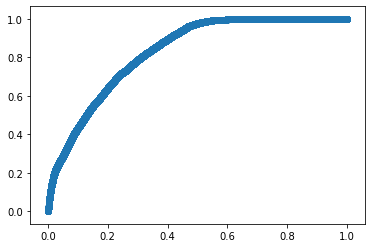

In [12]:
import matplotlib.pyplot as plt
plt.scatter(fpr_keras, tpr_keras)
plt.show()